## Simple autoencoder-Reconstructing the existing image, which will contain important features of the image

### Author: ruthvicp
### Date: May 3, 2019

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

C:\Users\ruthv\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32 
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,)) 

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

### Q1 & Q2 - Show the accuracy & loss plots in tensorboard

In [3]:
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="./Graph_new",histogram_freq= 0,write_graph=True, write_images=True)

In [4]:
#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test), callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.3575 - acc: 0.7532 - val_loss: 0.2707 - val_acc: 0.7951
Epoch 2/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.2634 - acc: 0.7977 - val_loss: 0.2523 - val_acc: 0.7973
Epoch 3/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.2420 - acc: 0.7977 - val_loss: 0.2293 - val_acc: 0.7973A: 0s - loss: 0.2437 
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2214 - acc: 0.7975 - val_loss: 0.2114 - val_acc: 0.7972
Epoch 5/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.2067 - acc: 0.7983 - val_loss: 0.1992 - val_acc: 0.7984 0.2087 - ETA: 0s - loss: 0.20
Epoch 6/10
60000/60000 [==============================] - 5s 91us/step - loss: 0.1961 - acc: 0.7995 - val_loss: 0.1902 - val_acc: 0.8000
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - los

In [6]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)    

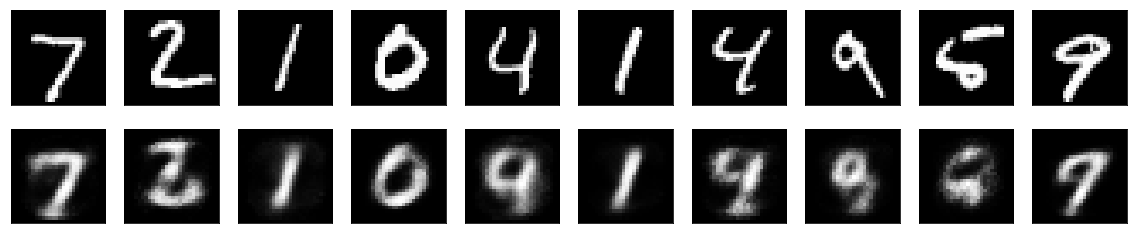

In [8]:
# use Matplotlib 
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Q3 - Add an activity regularizer

In [10]:
from keras import regularizers
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(0.01))(input_img)

### Q4 - Add hidden layers

In [14]:
#additional hidden layer for Part 3 of ICP
encode2 = Dense(16, activation='relu')(encoded)
decode2 = Dense(32, activation='relu')(encode2)


In [15]:
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(decode2)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [16]:
#seperate encoder model
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

#let's create a seperate decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Added metrics = accuracy so that Tensor Board will collect
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
#Added callback for TensorBoard
tbCallBack = TensorBoard(log_dir='./Graph_new', histogram_freq=0, write_graph=True, write_images=True)

from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [19]:
#Added Callback for Tensor Board
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[tbCallBack])

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.8535 - acc: 0.7729 - val_loss: 0.5048 - val_acc: 0.7833
Epoch 2/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2935 - acc: 0.8018 - val_loss: 0.2647 - val_acc: 0.8034
Epoch 3/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.2640 - acc: 0.8039 - val_loss: 0.2634 - val_acc: 0.8018
Epoch 4/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2634 - acc: 0.8038 - val_loss: 0.2630 - val_acc: 0.8018ss: 0.2 - ETA: 0s - loss: 0.2
Epoch 5/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.2631 - acc: 0.8038 - val_loss: 0.2629 - val_acc: 0.8014
Epoch 6/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.2631 - acc: 0.8038 - val_loss: 0.2629 - val_acc: 0.8011
Epoch 7/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2630 - acc: 

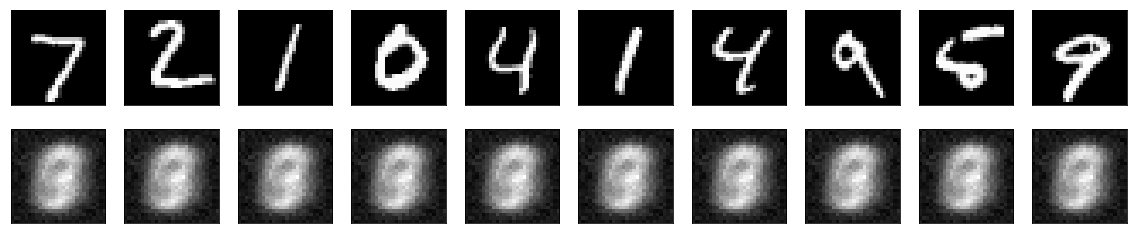

In [20]:
# use Matplotlib
import matplotlib.pyplot as plt
# displaying original and reconstructed image
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

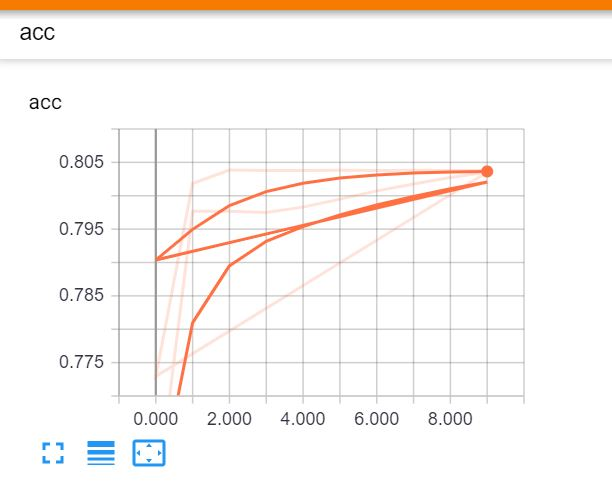

In [21]:
from IPython.display import Image
Image("../Documentation/acc.JPG")

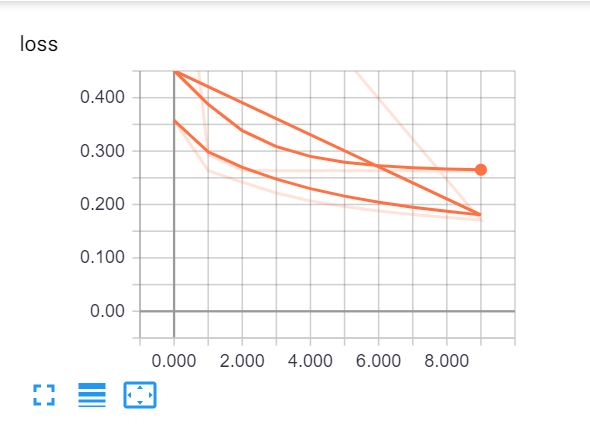

In [22]:
Image("../Documentation/loss.JPG")